# Clustering: extraindo padrões de dados

**Dataset:** Informações sobre clientes de um banco relacionados aos gastos utilizando cartão de crédito.

**Fonte:** Kaggle - [Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

# Primeiras visualizações do dataset


* O dataset será baixado diretamente via código.
* Para que esse código seja executado, é necessário ter um cadastro no **Kaggle** e gerar seu próprio **API Token**.
* **Tutorial:** https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/
* No Colab, o dataset baixado estará entre os arquivos temporários, acessíveis na barra lateral esquerda.

### Dicionário

**CUST_ID:** identificador do cliente.

**BALANCE:** saldo que o cliente tem disponível no cartão.

**BALANCE_FREQUENCY:** quão frequente o saldo é alterado (valor entre 0 e 1, com 1 sendo maior frequência e 0 menor frequência).

**PURCHASES:** valor gasto em compras no cartão nos últimos 6 meses.

**ONEOFFPURCHASES:** maior valor gasto à vista.

**INSTALLMENTSPURCHASES:** maior valor gasto com parcelamentos.

**CASH_ADVANCE:** valor gasto pelo cliente através de saque.

**PURCHASESFREQUENCY:** quão frequente compras são feitas (valor entre 0 e 1, com 1 sendo maior frequência e 0 menor frequência).

**ONEOFFPURCHASESFREQUENCY:** quão frequente compras são feitas à vista (valor entre 0 e 1, com 1 sendo maior frequência e 0 menor frequência).

**PURCHASESINSTALLMENTSFREQUENCY:** quão frequente compras são feitas com parcelamento (valor entre 0 e 1, com 1 sendo maior frequência e 0 menor frequência).

**CASHADVANCEFREQUENCY:** quão frequente são os pagamentos adiantados.

**CASHADVANCETRX:** número de transações feitas com pagamento adiantado.

**PURCHASESTRX:** quantidade de compras feitas no cartão.

**CREDIT_LIMIT:** limite do cartão de crédito.

**PAYMENTS:** valor em pagamentos feitos pelo cliente.

**MINIMUM_PAYMENTS:** total de pagamentos mínimos realizados.

**PRC_FULL_PAYMENT:** porcentagem da fatura integral paga pelo cliente.

**TENURE:** validade do cartão de crédito, tempo para renovação do contrato.


## Abertura do dataset

In [1]:
# Tutorial: https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/

!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/arjunbhasin2013/ccdata")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./ccdata" (use force=True to force download)


In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/ccdata/CC GENERAL.csv')
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Tratamentos dos dados

* A identificação do cliente (CUST_ID) e o tempo de contrato do cartão (TENURE) não são valores relacionados ao comportamento dos consumidores, portanto serão removidos do dataset. 

In [4]:
dataset.drop(columns = ['CUST_ID', 'TENURE'], inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

* Há valores inválidos ou ausentes.

In [5]:
dataset.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

* O **MINIMUN_PAYMENTS** possui uma quantidade considerável de valores faltantes, **CREDIT_LIMIT** tem apenas um valor faltante.

* Estes valores serão preenchidos com a mediana das colunas. Não será um valor exatamente correto, mas é uma aproximação aceitável nesse caso.

In [6]:
dataset.fillna(dataset.median(), inplace = True)
dataset.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [7]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


* Os valores presentes no dataset possuem muitas variações em suas amplitudes, por exemplo, as frequências, que são de 0 a 1, os valores relacionados a pagamentos, que chegam a até 76 mil.

* Portanto, os dados serão normalizados, entre 0 e 1.

In [8]:
from sklearn.preprocessing import Normalizer

In [9]:
values = Normalizer().fit_transform(dataset.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

# Sobre Validação

**Métricas Externas**

* Precisamos ter o labels

**Métricas Internas**

* Independentes das labels

**Critérios de Validação**

* Compactação
  * Quão próximos estão os pontos em um mesmo cluster.

* Separação
  * Quão bem separados estão os pontos em clusters diferentes.

## Coeficiente de Silhouette

* Varia no intervalo de -1 até 1.
* Valores acima de 0 já podem ser considerados bons dependendo do contexto e de outros modelos avaliados.
* Quanto mais próximo de 1 estiver o coeficiente, mais separados estarão os clusters, o agrupamento já está apropriado.
* Quanto mais próximo de 0, mais próximos estarão os clusters, possivelmente se interseccionando - podem ser considerados um único cluster.

## $s = \frac{\alpha - \beta}{max(\alpha, \beta)}$

>$\alpha$ = distância média entre um ponto específico e todos os outros pertencentes ao mesmo cluster (compactação).

>$\beta$ = distância média entre um ponto e todos os outros pontos do cluster *mais próximo* (separação). No cálculo feito "à mão", a média foi calculada para os vizinhos, depois foi escolhida a menor.

## Índice de Davies-Bouldin

* Em comparações sobre o mesmo dataset, o índice mais próximo de 0 indicará uma clusterização melhor.

$DB = \frac{1}{k} \sum\limits_{i=1}^{k} \max_{i \neq j} R_{ij}$

> $R_ij$ = medida de similaridade entre dois clusters $i$ e $j$.
  * $R_ij = \frac{s_i + s_j}{d_{ij}}$
  * $s$ = distância média entre o centroide e os outros pontos do cluster (compactação).
  * $d$ = similaridade entre clusters (separação).
  * Quanto menor este valor, mais similares são os clusters.

> $k$ = número de clusters.

## Índice Calinski-Harabasz

* Leva em consideração a dispersão dos pontos dentro do cluster. Assim como os outros, considera a dispersão dentro de um cluster e entre clusters diferentes.

* Este índice deve ser o mais alto possível em comparações sobre o mesmo dataset.

### $s = \frac{tr(B_k)}{tr(W_k)} \times \frac{n_E - k}{k-1}$

> $\frac{tr(B_k)}{tr(W_k)}$ = dispersão dentro do cluster e entre clusters.

> $\frac{n_E - k}{k-1}$ = faz a multiplicação do valor à esquerda em relação ao número de clusters e o número de elementos. 

> $n_E$ = número de elementos.

> $k$ = número de clusters,

> $B_k$ = dispersão dos pontos entre clusters (Between).
* $B_k = \sum\limits_{q=1}^{k} n_q(c_q - c_E)(c_q - c_E)^T$
* $q$ = cluster
* $k$ = número de clusters
* $n_q$ = número de elementos no cluster
* $c_q$ = centroide do cluster
* $c_E$ = centroide dos elementos $→$ centroide de todos os pontos do dataset
* O resultado será uma matriz. Quanto maior o valor resultante pra uma dada variável, mais disperso aquele cluster será dos outros, considerando esta variável.

> $W_k$ = dispersão dos pontos dentro do cluster (Within).
* $W_k = \sum\limits_{q=1}^{k} \sum\limits_{x \in C_q}^{} (x - c_q)(x - c_q)^T$
* $q$ = cluster
* $k$ = número de clusters
* O somatório interno (à direita) é uma estimação da matriz de variância-covariância
* O resultado será uma matriz. Quanto menor o valor resultante pra uma dada variável, mais compacto aquele cluster é para ela.

> $tr(x)$ = traço, soma dos valores da diagonal principal da matriz.

# Clusterização com K-Means

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = kmeans.fit_predict(values)

## Avaliação do Modelo

In [12]:
from sklearn import metrics

In [13]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')

print(f'Coeficiente de Silhouette = {silhouette}')

Coeficiente de Silhouette = 0.3645252169780562


In [14]:
dbs = metrics.davies_bouldin_score(values, labels)

print(f'Índice de Davies-Bouldin = {dbs}')

Índice de Davies-Bouldin = 1.0756224069224563


In [15]:
calinski = metrics.calinski_harabasz_score(values, labels)

print(f'Índice Calinski-Harabasz = {calinski}')

Índice Calinski-Harabasz = 3431.798945679164


# Comparações entre modelos

* Serão testadas diferentes modelos utilizando k-Means e variações no número de clusters.

* As comparações serão feitas sobre o mesmo dataset e as três validações resumidas acima.

In [16]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300)
  labels = kmeans.fit_predict(values)

  silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
  dbs = metrics.davies_bouldin_score(values, labels)
  calinski = metrics.calinski_harabasz_score(values, labels)

  return silhouette, dbs, calinski

In [17]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
#max_clusters = 20
max_clusters = 8

for qnt in range(2, max_clusters):
  s_qnt, dbs_qnt, cal_qnt = clustering_algorithm(qnt, values)
  silhouette_scores.append(s_qnt)
  davies_bouldin_scores.append(dbs_qnt)
  calinski_harabasz_scores.append(cal_qnt)

In [18]:
labels_nclusters = [str(i) for i in range(2, max_clusters)]
metrics_names = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']

scores = pd.DataFrame(data = [silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores], columns = labels_nclusters)
scores = scores.transpose()
scores = scores.rename(columns = { 0 : 'Silhouette',
                          1 : 'Davies-Bouldin',
                          2 : 'Calinski-Harabasz'})

In [19]:
import plotly.express as px

fig = px.line(scores['Silhouette'], markers = True, 
              title = "Coeficiente de Silhouette com aumento no número de clusters",
              labels = {'index' : 'Número de clusters', 'value': 'Coeficiente'})
fig.update_layout(showlegend = False)
fig.show()

* O Coeficiente de Silhouette deve ser positivo e o mais próximo de 1.
* Neste caso, as quantidades de clusters mais promissoras foram 5 e 6. 

In [20]:
fig = px.line(scores['Davies-Bouldin'], markers = True, 
              title = "Índice de Davies-Bouldin com aumento no número de clusters",
              labels = {'index' : 'Número de clusters', 'value': 'Índice'})
fig.update_layout(showlegend = False)
fig.show()

* O Índice de Davies-Bouldin mais promissor será o mais próximo de 0.
* Neste caso, a quantidade de clusters mais promissora foi o 6, mas o 5 também seria aceitável. 

In [21]:
fig = px.line(scores['Calinski-Harabasz'], markers = True, 
              title = "Índice de Calinski-Harabasz com aumento no número de clusters",
              labels = {'index' : 'Número de clusters', 'value': 'Índice'})
fig.update_layout(showlegend = False)
fig.show()

* O Índice de Calinski-Harabasz deve ser o mais alto possível.
* Neste caso, a quantidade de clusters mais promissora foi o 6, 4 e 3. 

* Nas três métricas, 6 clusters foi uma quantidade que apresentou os melhores resultados.

# Clusterização k-Means com 6 clusters

In [22]:
kmeans_6clusters = KMeans(n_clusters = 6, n_init = 10, max_iter = 300)
labels = kmeans_6clusters.fit_predict(values)

silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
dbs = metrics.davies_bouldin_score(values, labels)
chs = metrics.calinski_harabasz_score(values, labels)

print(f'Coeficiente de Silhouette = {silhouette}')
print(f'Índice de Davies-Bouldin = {dbs}')
print(f'Índice Calinski-Harabasz = {chs}')

Coeficiente de Silhouette = 0.36484690615539817
Índice de Davies-Bouldin = 1.045416829410436
Índice Calinski-Harabasz = 3523.5169999912364


## Comparação com conjunto de dados aleatórios

* Ter pontuações abaixo deste modelo aleatório indicaria que o modelo comparado está muito ruim.

In [23]:
import numpy as np

random_data = np.random.rand(8950, 16)
s_rand, dbs_rand, chs_rand = clustering_algorithm(6, random_data)

print(s_rand, dbs_rand, chs_rand)
print(silhouette, dbs, chs)

0.3648544574844091 1.045346318038766 3523.516921381917
0.36484690615539817 1.045416829410436 3523.5169999912364


# Validação de estabilidade do cluster

* Um modelo estável terá métricas semelhantes em todos os seus subconjuntos de dados.

* O dataset será dividido e cada subconjunto será validado separadamente.

In [24]:
set1, set2, set3 = np.array_split(values, 3)

s1, db1, ch1 = clustering_algorithm(6, set1)
s2, db2, ch2 = clustering_algorithm(6, set2)
s3, db3, ch3 = clustering_algorithm(6, set3)

print(s1, db1, ch1)
print(s2, db2, ch2)
print(s3, db3, ch3)

0.3648544574844091 1.045346318038766 3523.516921381917
0.36484028872554186 1.0451055374019909 3523.5123120322874
0.3649264490965924 1.0452819229307646 3523.5138931996366


* As métricas foram consideradas suficientemente próximas do treinamento com o dataset completo.

# Visualização gráfica de atributos

## Purchases x Payments


Relação entre quanto o cliente gastou com o cartão e o quanto ele já pagou ao banco.

In [25]:
import matplotlib.pyplot as plt

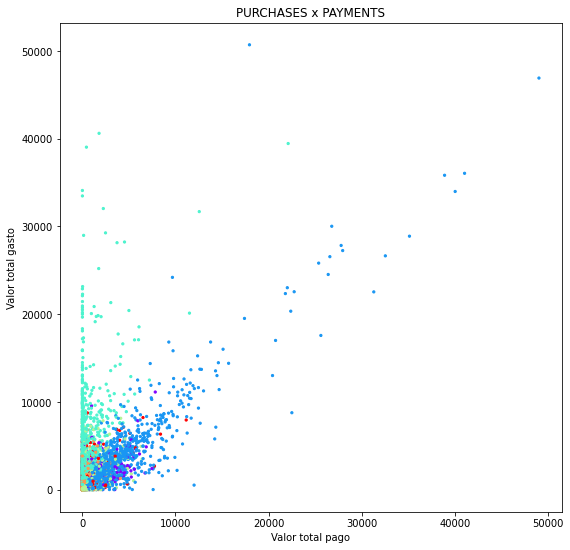

In [26]:
labels = kmeans_6clusters.labels_

plt.figure(figsize = (9,9))
plt.scatter(dataset['PURCHASES'], dataset['PAYMENTS'], c = labels, s = 5, cmap = 'rainbow')
plt.title('PURCHASES x PAYMENTS')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')

plt.show()

* Nesta visualização, não foi possível ver e interpretar bem todos os clusters.

* Os pontos pertencentes ao cluster vermelho tendem a seguir uma linha vertical para cima, próximos ao eixo y. Em parte, este cluster está representando clientes que fizeram gastos no cartão de crédito mas pagaram pouco da fatura, não pagaram, ou pagaram apenas o valor mínimo.

* Os pontos do cluster roxo têm uma tendência mais próxima da diagonal em ângulo reto, ou seja, clientes que consumiram e pagaram suas faturas no valor total.

* A visualização par a par torna-se muito custosa para tantos atributos. Tanto a interpretação fica complicada, quanto os gráficos são muito numerosos.

# Análise descritiva das features por cluster

## Descrição das features com .describe()

* **BALANCE:** saldo que o cliente tem disponível no cartão.

In [27]:
dataset['CLUSTER'] = labels

In [28]:
dataset.groupby('CLUSTER')['BALANCE'].describe()

,count,mean,std,min,25%,50%,75%,max
CLUSTER,,,,,,,,
0,1795.0,3243.453065,2630.601769,114.523682,1356.975486,2270.227330,4492.351320,18495.558550
1,1487.0,1118.416028,1648.962974,0.000000,208.867070,541.240795,1357.885439,19043.138560
2,980.0,1765.930464,2002.399798,0.000000,496.729589,1064.390915,2266.235261,14581.459140
3,3203.0,418.043217,797.366382,0.000000,22.836917,79.345909,379.791429,7533.854422
4,1143.0,2429.889170,2032.506183,1.691842,945.019242,1845.210833,3327.567339,11581.933500
5,342.0,1959.062058,1816.549846,70.794108,1010.501276,1301.788287,2150.506925,11209.370760


* Os clientes de um dos clusters são os que têm menores saldos disponíveis e são os que realizam mais compras.

* Neste caso, a visualização também é muito dificultada pela quantidade de features, mesmo que filtrássemos para apenas duas métricas de cada.

## Features mais representativas

In [29]:
centroids = kmeans_6clusters.cluster_centers_
centroids

array([[5.61746045e-01, 3.00429495e-04, 8.33227540e-02, 4.70907135e-02,
        3.62699125e-02, 1.05009065e-01, 8.68599778e-05, 3.31882505e-05,
        6.00969614e-05, 4.31350059e-05, 7.54801912e-04, 1.84143087e-03,
        7.20740979e-01, 1.91232115e-01, 2.10625156e-01, 1.16017114e-07],
       [1.54530525e-01, 2.44386253e-04, 4.43713957e-01, 2.60359749e-01,
        1.83531598e-01, 2.62370968e-02, 2.04868349e-04, 8.97570444e-05,
        1.50849703e-04, 9.45543357e-06, 1.73643238e-04, 6.18921769e-03,
        6.03241698e-01, 4.00539356e-01, 8.39114078e-02, 7.30838144e-05],
       [2.29045356e-01, 2.10580758e-04, 6.85258552e-02, 3.87980177e-02,
        2.97335416e-02, 3.65403026e-01, 5.84641147e-05, 2.26843328e-05,
        3.95892801e-05, 5.84615148e-05, 1.41344595e-03, 1.30201436e-03,
        5.23023522e-01, 6.33043838e-01, 1.05823893e-01, 3.09366236e-05],
       [6.51934057e-02, 2.31532135e-04, 1.22106378e-01, 4.79063836e-02,
        7.43026648e-02, 1.96993476e-02, 1.74953853e-04, 3.382

* Cada centroide tem 16 coordenadas, cada uma em um eixo/feature.

* Os atributos mais significativos serão os que determinarem maiores mudanças de valores, ou seja, os atributos com centroides mais dispersos.

* Para encontrar estes atributos, podemos medir a variância dentro de cada feature/eixo.

In [30]:
max = len(centroids[0])
cluster = []
variancia = []

for i in range(max):
  #print(f'{dataset.columns.values[i].ljust(35)} {centroids[:, i].var():.4f}')
  cluster.append(dataset.columns.values[i])
  variancia.append(centroids[:, i].var())

variancias = pd.DataFrame([cluster, variancia]).transpose().rename(columns = {0:'cluster', 1:'variancia'})
variancias.sort_values('variancia', ascending = False, inplace = True)
variancias.head(6)

,cluster,variancia
14,MINIMUM_PAYMENTS,0.053877
12,CREDIT_LIMIT,0.034796
5,CASH_ADVANCE,0.034479
13,PAYMENTS,0.029975
0,BALANCE,0.025413
2,PURCHASES,0.01832


* O atributo MINIMUM_PAYMENTS, apesar de ter uma alta variância, não está diretamente relacionado ao comportamento consumidor do cliente, portanto será desconsiderado.

* As análises serão feitas sobre os outros 5 atributos com maiores variâncias/influências sobre a escolha dos clusters.

# Análise por atributos e clusters

* Características dos clusters de acordo com médias de cada atributo.

* **BALANCE:** Valor em faturas, todas as parcelas pendentes no cartão.
* **PURCHASES:** Valor total em gastos nos últimos 6 meses.
* **CASH_ADVANCE:** Gasto do cliente através de saque.
* **CREDIT_LIMIT:** Limite total do cartão de crédito do cliente.
* **PAYMENTS:** Valor em pagamentos feitos pelo cliente, relacionado ao BALANCE.
  * Clientes com PAYMENTS < BALANCE estariam devendo dinheiro?
  * Para ter mais informações sobre isso, podemos analisar o PRC_FULL_PAYMENT.
* **PRC_FULL_PAYMENT:** porcentagem da fatura integral paga pelo cliente.

In [31]:
description = dataset.groupby('CLUSTER')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
n_clients_per_cluster = description.size()
description = description.mean()
description['N_CLIENTS'] = n_clients_per_cluster

description

<ipython-input-31-021b6b0237a6>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,N_CLIENTS
CLUSTER,,,,,,
0,3243.453065,519.081944,763.180348,4419.582173,1052.266959,1795
1,1118.416028,3328.473968,185.757811,4110.127876,3051.122230,1487
2,1765.930464,528.087051,3088.658417,3950.837972,4997.168685,980
3,418.043217,628.781670,119.403237,5132.733927,816.706836,3203
4,2429.889170,238.958031,3106.656278,4475.065617,974.996683,1143
5,1959.062058,856.281725,451.824341,2198.684211,1339.886001,342


In [32]:
dataset.groupby('CLUSTER')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
CLUSTER,,,,,,,,
0,1795.0,0.000097,0.002910,0.0,0.0,0.000000,0.000000,0.090909
1,1487.0,0.284099,0.369403,0.0,0.0,0.083333,0.571429,1.000000
2,980.0,0.128571,0.197457,0.0,0.0,0.083333,0.166667,1.000000
3,3203.0,0.252640,0.348828,0.0,0.0,0.000000,0.454545,1.000000
4,1143.0,0.008869,0.044389,0.0,0.0,0.000000,0.000000,0.600000
5,342.0,0.022729,0.099126,0.0,0.0,0.000000,0.000000,1.000000


> A numeração atribuída aos clusters pode mudar, mas as métricas tendem a se manter.

* **Cluster 0**
  * Clientes com maiores valores pendentes na fatura.
  * Clientes com as menores porcentagens de faturas pagas. Piores pagadores.
  > Clientes que gastam muito e são os piores pagadores. Cerca de 20%.
  > Semelhante ao cluster 4, mas preferem efetuar compras direto no cartão.

* **Cluster 1**
  * Clientes com maiores gastos.
  * Clientes com os menores valores gastos em saques (segundo menor).
  * Clientes com as maiores porcentagens de faturas pagas. Melhores pagadores.
  > Clientes que gastam mais e são os melhores pagadores. Cerca de 16%.

* **Cluster 2**
  * Clientes com maiores valores gastos em saques (segundo maior, bem próximo).
  > Clientes que preferem gastar através de saques e são pagadores medianos. Cerca de 11%.

* **Cluster 3**
  * Clientes com menores valores pendentes na fatura.
  * Clientes com menores valores gastos em saques.
  * Clientes com os maiores limites de crédito.
  * Clientes com boas porcentagens de faturas pagas. Bons pagadores.
  > Clientes que gastam pouco e são bons pagadores. Maior grupo de clientes, cerca de 35%.

* **Cluster 4**
  * Clientes com os menores gastos.
  * Clientes com maiores valores gastos em saques.
  * Clientes com a segunda pior porcentagem de faturas pagas. Maus pagadores.
  > Clientes que gastam muito em saques e são maus pagadores. Cerca de 12%.
  > Semelhante ao cluster 0, mas preferem gastar usando dinheiro.

* **Cluster 5**
  * Clientes com o menor limite de crédito.
  * Não são bons pagadores.
  > Clientes que não se encaixaram em picos, têm o menor limite de crédito e não são bons pagadores. É o menor grupo de clientes, cerca de 4%.

## Possíveis ações utilizando esses clusters

* Uma ação direcionada ao grupo 3 atingiria a maior quantidade de clientes, por ser o cluster mais numeroso. Esses clientes são bons pagadores, o que é bom para o banco, mas gastam pouco. Seria interessante encontrar uma forma desse clientes gastarem mais utilizando este cartão, incentivando eles a receber seus salários diretamente neste banco ou oferecendo algum plano de fidelização, por exemplo.

* Esta mesma estratégia pode ser aplicada ao grupo 1, pois clientes mais consumistas são mais lucrativos.

* Estas estratégias podem ser avaliadas através de Testes A/B, com os grupos sendo divididos aleatoriamente em teste e controle, por um determinado tempo. Caso haja um aumento relevante no lucro da empresa, a estratégia de negócio pode ser aplicada a todos os clientes pertencentes a estes perfis.